In [67]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image

In [73]:
ref_dir = r"dataset_project_iapr2025\references"  # set directory path
refs = pd.DataFrame(columns=['name', 'image'])
output_dir = r"dataset_project_iapr2025\lowRes"
os.makedirs(output_dir, exist_ok=True)

for entry in os.scandir(ref_dir):  
    if entry.is_file():  # check if it's a file
        print(entry.name)
        # Load image
        img = Image.open(entry.path)
        new_size = (img.width // 10, img.height // 10)
        img_resized = img.resize(new_size, resample=Image.Resampling.LANCZOS)
        output_path = os.path.join(output_dir, 'Low_' + entry.name)
        img_resized.save(output_path)
        print(str('Low' + entry.name))#,'-->', img.shape)
        #row = pd.DataFrame([[entry.name,img_he]], columns=['name', 'image'])
        #refs = pd.concat([refs,row])

print('finished')

Amandina.JPG
LowAmandina.JPG
Arabia.JPG
LowArabia.JPG
Comtesse.JPG
LowComtesse.JPG
Creme_brulee.JPG
LowCreme_brulee.JPG
Jelly_Black.JPG
LowJelly_Black.JPG
Jelly_Milk.JPG
LowJelly_Milk.JPG
Jelly_White.JPG
LowJelly_White.JPG
Noblesse.JPG
LowNoblesse.JPG
Noir_authentique.JPG
LowNoir_authentique.JPG
Passion_au_lait.JPG
LowPassion_au_lait.JPG
Stracciatella.JPG
LowStracciatella.JPG
Tentation_noir.JPG
LowTentation_noir.JPG
Triangolo.JPG
LowTriangolo.JPG
finished


In [72]:
ref_dir = r"dataset_project_iapr2025\train"  # set directory path
refs = pd.DataFrame(columns=['name', 'image'])
output_dir = r"dataset_project_iapr2025\lowResTrain"
os.makedirs(output_dir, exist_ok=True)

for entry in os.scandir(ref_dir):  
    if entry.is_file():  # check if it's a file
        print(entry.name)
        # Load image
        img = Image.open(entry.path)
        new_size = (img.width // 10, img.height // 10)
        img_resized = img.resize(new_size, resample=Image.Resampling.LANCZOS)
        output_path = os.path.join(output_dir, 'Low_' + entry.name)
        img_resized.save(output_path)
        print(str('Low' + entry.name))#,'-->', img.shape)
        #row = pd.DataFrame([[entry.name,img_he]], columns=['name', 'image'])
        #refs = pd.concat([refs,row])

print('finished')

L1000756.JPG
LowL1000756.JPG
L1000763.JPG
LowL1000763.JPG
L1000765.JPG
LowL1000765.JPG
L1000768.JPG
LowL1000768.JPG
L1000772.JPG
LowL1000772.JPG
L1000779.JPG
LowL1000779.JPG
L1000780.JPG
LowL1000780.JPG
L1000785.JPG
LowL1000785.JPG
L1000788.JPG
LowL1000788.JPG
L1000791.JPG
LowL1000791.JPG
L1000792.JPG
LowL1000792.JPG
L1000793.JPG
LowL1000793.JPG
L1000797.JPG
LowL1000797.JPG
L1000799.JPG
LowL1000799.JPG
L1000802.JPG
LowL1000802.JPG
L1000804.JPG
LowL1000804.JPG
L1000808.JPG
LowL1000808.JPG
L1000810.JPG
LowL1000810.JPG
L1000812.JPG
LowL1000812.JPG
L1000815.JPG
LowL1000815.JPG
L1000817.JPG
LowL1000817.JPG
L1000826.JPG
LowL1000826.JPG
L1000827.JPG
LowL1000827.JPG
L1000828.JPG
LowL1000828.JPG
L1000831.JPG
LowL1000831.JPG
L1000843.JPG
LowL1000843.JPG
L1000844.JPG
LowL1000844.JPG
L1000850.JPG
LowL1000850.JPG
L1000851.JPG
LowL1000851.JPG
L1000854.JPG
LowL1000854.JPG
L1000859.JPG
LowL1000859.JPG
L1000866.JPG
LowL1000866.JPG
L1000870.JPG
LowL1000870.JPG
L1000872.JPG
LowL1000872.JPG
L1000875.JPG
L

Processing image... Low_Amandina.JPG
Processing image... Low_Arabia.JPG
Processing image... Low_Comtesse.JPG
Processing image... Low_Creme_brulee.JPG
Processing image... Low_Jelly_Black.JPG
Processing image... Low_Jelly_Milk.JPG
Processing image... Low_Jelly_White.JPG
Processing image... Low_Noblesse.JPG
Processing image... Low_Noir_authentique.JPG
Processing image... Low_Passion_au_lait.JPG
Processing image... Low_Stracciatella.JPG
Processing image... Low_Tentation_noir.JPG
Processing image... Low_Triangolo.JPG
Saved cleaned prototype for Low_Amandina
Saved cleaned prototype for Low_Arabia
Saved cleaned prototype for Low_Comtesse
Saved cleaned prototype for Low_Creme_brulee
Saved cleaned prototype for Low_Jelly_Black
Saved cleaned prototype for Low_Jelly_Milk
Saved cleaned prototype for Low_Jelly_White
Saved cleaned prototype for Low_Noblesse
Saved cleaned prototype for Low_Noir_authentique
Saved cleaned prototype for Low_Passion_au_lait
Saved cleaned prototype for Low_Stracciatella
S

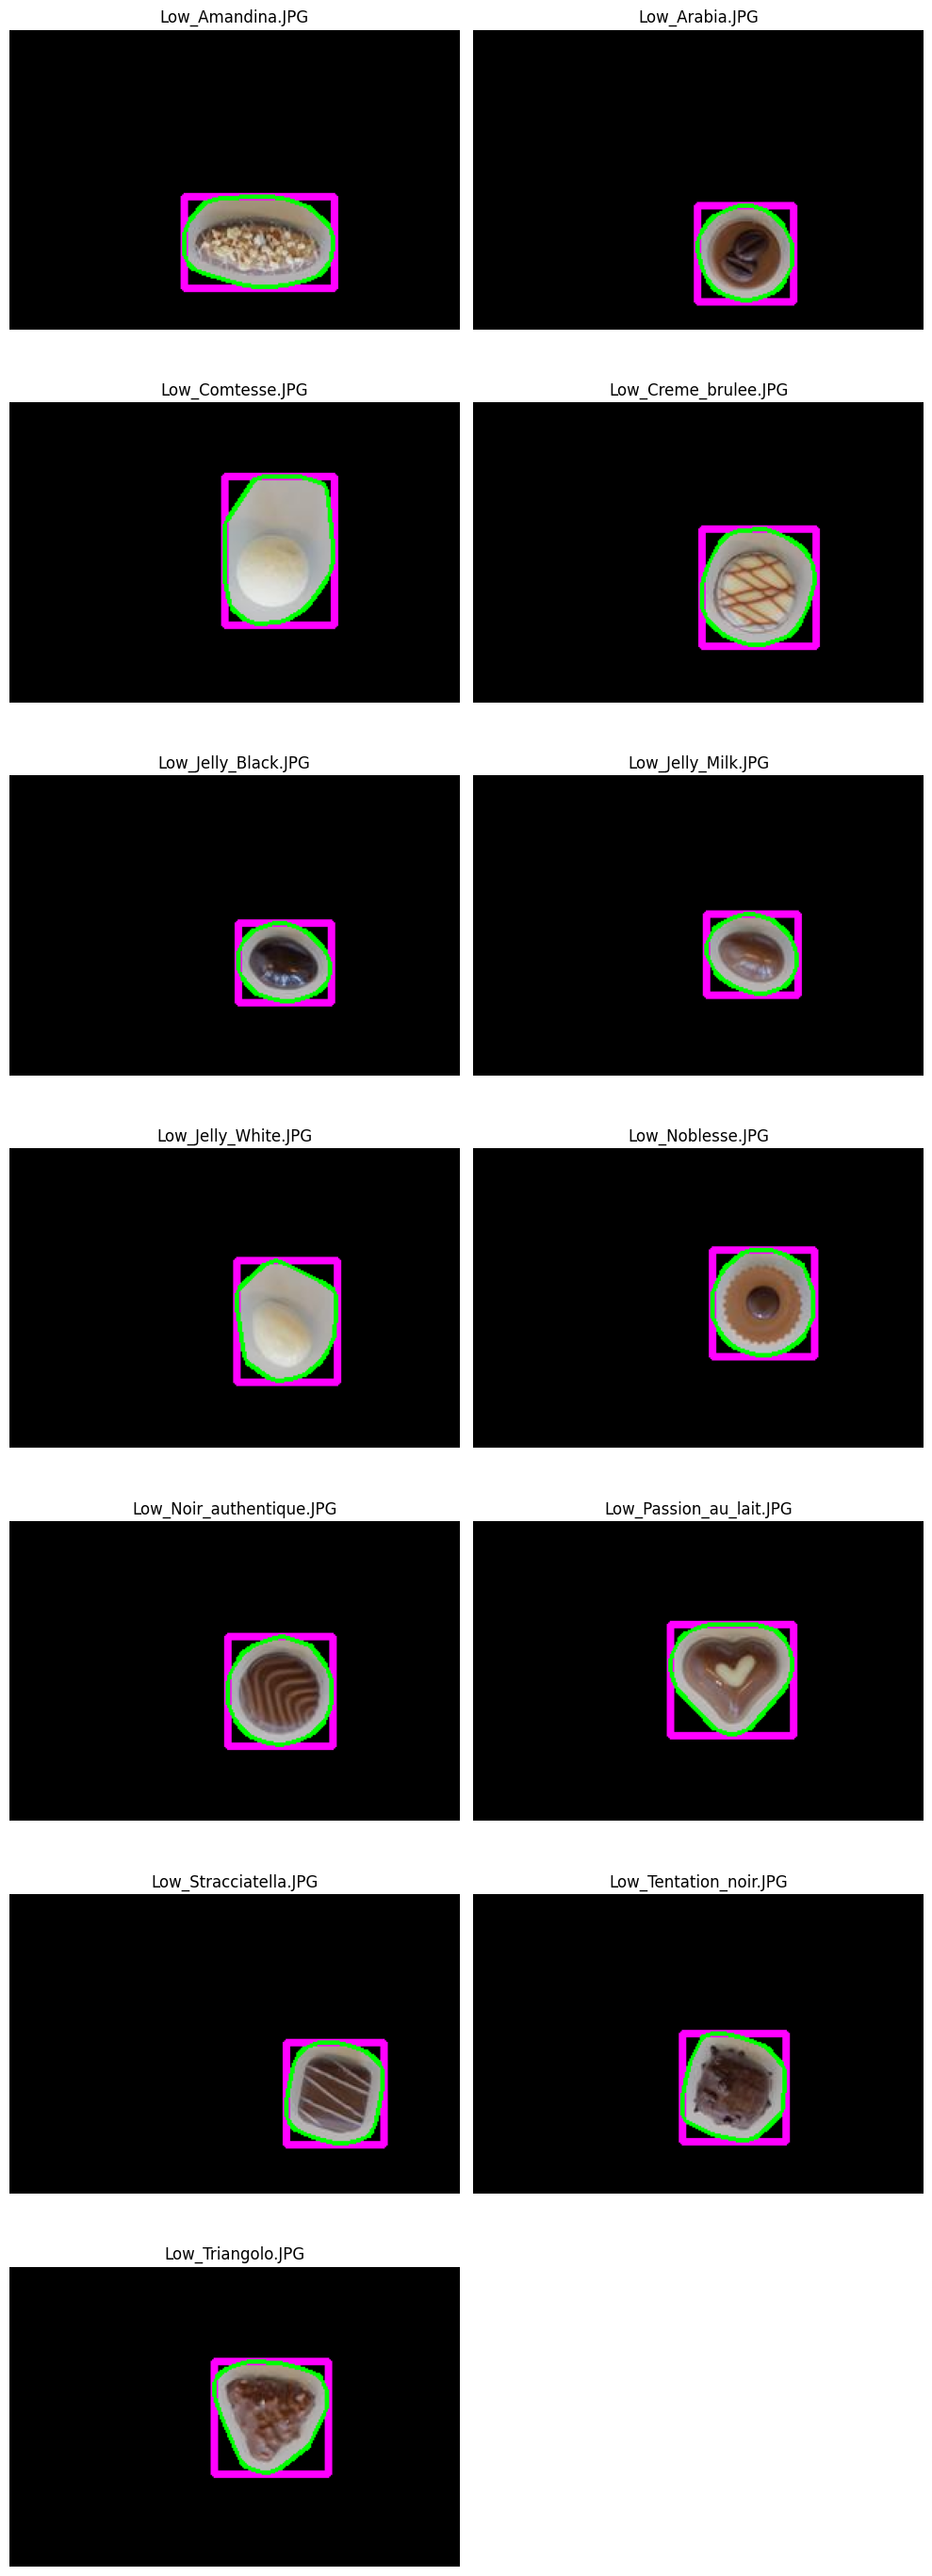

In [74]:
def extract_chocolate(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    h, w = gray.shape

    #background = median of border pixels
    border_pixels = np.hstack([
        gray[0, :], gray[-1, :], gray[:, 0], gray[:, -1]
    ])
    bg_val = int(np.median(border_pixels))

    diff = cv2.absdiff(gray, np.full_like(gray, bg_val))

    _, mask = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (9, 9))
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel, iterations=3)
    mask = cv2.dilate(mask, kernel, iterations=2)

    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if not contours:
        return None, None

    # pick largest by area
    main_cnt = max(contours, key=cv2.contourArea)
    hull = cv2.convexHull(main_cnt)
    x, y, w_box, h_box = cv2.boundingRect(hull)

    hull_mask = np.zeros_like(gray)
    cv2.drawContours(hull_mask, [hull], -1, 255, thickness=-1)
    extracted = cv2.bitwise_and(image, image, mask=hull_mask)

    return extracted, (x, y, w_box, h_box), hull

folder = r"dataset_project_iapr2025\lowRes"
image_files = [
    fn for fn in os.listdir(folder)
    if fn.lower().endswith(('.jpg', '.jpeg'))
]
results = []

for fn in image_files:
    print("Processing image...", fn)
    path = os.path.join(folder, fn)
    img = cv2.imread(path)
    # crop to the middle 
    h, w = img.shape[:2]
    img = img[h//4:3*h//4, w//4:3*w//4]
    if img is None:
        print(f"[!] Could not read {path}, skipping.")
        continue

    extracted, bbox, contour = extract_chocolate(img)
    if extracted is None:
        print(f"[!] No chocolate detected in {fn}.")
        continue

    results.append((fn, img, extracted, bbox, contour))

os.makedirs('clean_references', exist_ok=True)

for fn, orig, _, (x, y, w_box, h_box), cont in results:
    cv2.drawContours(orig, [cont], -1, (0, 255, 0), 2)
    patch = orig[y:y+h_box, x:x+w_box]
    # resize to a common size --- think about which, now 200x200
    patch = cv2.resize(patch, (200, 200), interpolation=cv2.INTER_AREA)
    name, _ = os.path.splitext(fn)
    cv2.imwrite(f'clean_references/{name}.png', patch)
    print(f"Saved cleaned prototype for {name}")

n = len(results)
cols = 2
rows = (n + cols - 1) // cols
plt.figure(figsize=(cols * 5, rows * 4))
for idx, (fn, orig, extr, (x, y, w, h), cont) in enumerate(results, 1):
    ax = plt.subplot(rows, cols, idx)
    boxed = extr.copy()#orig.copy()
    cv2.rectangle(boxed, (x, y), (x + w, y + h), (255, 0, 255), 3)
    cv2.drawContours(boxed, [cont], -1, (0, 255, 0), 2)
    boxed = cv2.cvtColor(boxed, cv2.COLOR_BGR2RGB)
    ax.imshow(boxed)
    ax.set_title(fn)
    ax.axis('off')

plt.tight_layout()
plt.show()

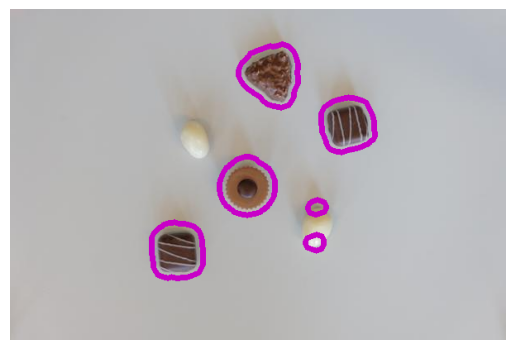

In [75]:
image = cv2.imread(r'dataset_project_iapr2025\lowResTrain\Low_L1000756.JPG')

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
h, w = gray.shape

border_pixels = np.hstack([
    gray[0, :], gray[-1, :], gray[:, 0], gray[:, -1]
])
bg_val = int(np.median(border_pixels))

diff = cv2.absdiff(gray, np.full_like(gray, bg_val))

_, mask = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (9, 9))
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel, iterations=3)
mask = cv2.dilate(mask, kernel, iterations=2)

contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

for cnt in contours:
    cv2.drawContours(image, [cnt], -1, (200, 0, 200), 5)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

>> Loading reference histograms …
Loaded reference 'Low_Amandina'
Loaded reference 'Low_Arabia'
Loaded reference 'Low_Comtesse'
Loaded reference 'Low_Creme_brulee'
Loaded reference 'Low_Jelly_Black'
Loaded reference 'Low_Jelly_Milk'
Loaded reference 'Low_Jelly_White'
Loaded reference 'Low_Noblesse'
Loaded reference 'Low_Noir_authentique'
Loaded reference 'Low_Passion_au_lait'
Loaded reference 'Low_Stracciatella'
Loaded reference 'Low_Tentation_noir'
Loaded reference 'Low_Triangolo'
>> Found 10 pieces


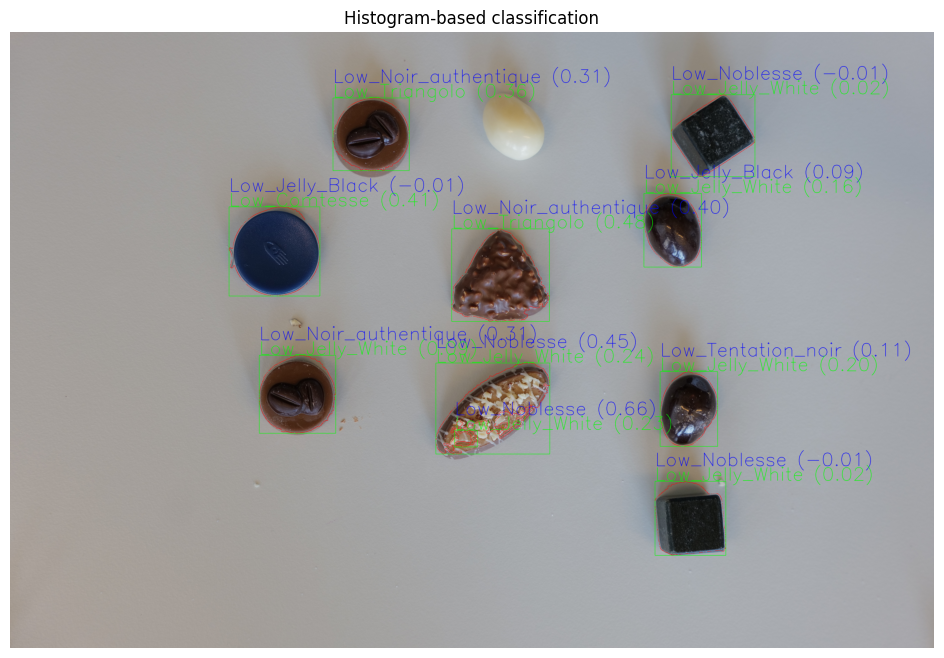

In [64]:
REF_DIR         = 'clean_references'
TEST_IMAGE      = r'dataset_project_iapr2025\train\L1000810.JPG'  #L1000757
MIN_AREA        = 5000 # remove tiny specks
MORPH_KSIZE     = 9
HIST_CHANNELS   = [0, 2] # Hue & Value
HIST_BINS       = [50, 50]
HIST_RANGES     = [0, 180, 0, 256]  
HIST_METHOD     = cv2.HISTCMP_CORREL # correlation metric

def get_fourier_descriptors(contour, k=5, normalize=True):
    cnt = contour.squeeze()
    if cnt.ndim != 2 or cnt.shape[1] != 2:
        raise ValueError("Contour shape is invalid.")

    complex_cnt = cnt[:, 0] + 1j * cnt[:, 1]
    fourier_desc = np.fft.fft(complex_cnt)

    if normalize:
        fourier_desc[0] = 0  # remove translation
        fourier_desc /= np.abs(fourier_desc[1])  # scale invariance
        fourier_desc = np.abs(fourier_desc)  # rotation invariance

    return fourier_desc[:k]

def load_reference_hists(ref_dir):
    ref_hists = {}
    ref_F = {}
    for fn in sorted(os.listdir(ref_dir)):
        if not fn.lower().endswith('.png'):
            continue
        cls_name = os.path.splitext(fn)[0]
        img = cv2.imread(os.path.join(ref_dir, fn))
        if img is None:
            raise IOError(f"Could not load {fn}")
        hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
        # full‐patch hist (we assume tight crops)
        hist = cv2.calcHist([hsv], HIST_CHANNELS, None, HIST_BINS, HIST_RANGES)
        hist = cv2.normalize(hist, hist).flatten()
        ref_hists[cls_name] = hist
        
        lower_green = np.array([50, 100, 100])
        upper_green = np.array([70, 255, 255])
        # 3. Create mask for green
        mask = cv2.inRange(hsv, lower_green, upper_green)

        # 4. Find contours
        contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        
        if not contours:
            return None

        contour = max(contours, key=cv2.contourArea)
        F_contour = get_fourier_descriptors(contour)

        ref_F[cls_name] = F_contour

        print(f"Loaded reference '{cls_name}'")
    return ref_hists, ref_F


def segment_pieces(img_bgr):
    gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
    h, w = gray.shape

    border = np.hstack([gray[0,:], gray[-1,:], gray[:,0], gray[:,-1]])
    bg_val = int(np.median(border))

    diff = cv2.absdiff(gray, np.full_like(gray, bg_val))
    _, mask = cv2.threshold(diff, 0, 255,
                            cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    kern = cv2.getStructuringElement(
        cv2.MORPH_ELLIPSE, (MORPH_KSIZE, MORPH_KSIZE)
    )
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kern, iterations=3)
    mask = cv2.dilate(mask, kern, iterations=2)

    contours, _ = cv2.findContours(
        mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE
    )
    pieces = []
    for c in contours:
        area = cv2.contourArea(c)
        if area < MIN_AREA:
            continue
        x, y, w_box, h_box = cv2.boundingRect(c)
        piece_mask = np.zeros_like(gray)
        cv2.drawContours(piece_mask, [c], -1, 255, thickness=-1)
        pieces.append((piece_mask, (x, y, w_box, h_box),c))
    return pieces


def classify_piece_by_hist(patch_bgr, patch_mask, ref_hists):
    hsv = cv2.cvtColor(patch_bgr, cv2.COLOR_BGR2HSV)
    hist = cv2.calcHist([hsv], HIST_CHANNELS, patch_mask,
                        HIST_BINS, HIST_RANGES)
    hist = cv2.normalize(hist, hist).flatten()

    best_cls, best_score = None, -1
    for cls, ref_hist in ref_hists.items():
        score = cv2.compareHist(ref_hist, hist, HIST_METHOD)
        if score > best_score:
            best_score, best_cls = score, cls
    return best_cls, best_score

def classify_piece_by_F_desc(cont_F, ref_Fs):
    #F_cont = get_fourier_descriptors(cont_F)

    best_cls, best_score = None, 1000000

    for cls, ref_F in ref_Fs.items():
        # Ensure same length
        min_len = min(len(cont_F), len(ref_F))
        d_cont = cont_F[:min_len]
        d_ref = ref_F[:min_len]

        # Use Euclidean distance
        # score = np.linalg.norm(d_cont - d_ref)
        
        # Use cosine similarity
        score = 1 - np.dot(d_cont, d_ref) / (np.linalg.norm(d_cont) * np.linalg.norm(d_ref))


        if score < best_score:
            best_score, best_cls = score, cls
    return best_cls, best_score



print(">> Loading reference histograms …")
ref_hists, ref_Fs = load_reference_hists(REF_DIR)

img = cv2.imread(TEST_IMAGE)
if img is None:
    raise IOError(f"Cannot load {TEST_IMAGE}")
pieces = segment_pieces(img)
print(f">> Found {len(pieces)} pieces")

for mask, (x, y, w_box, h_box), contour in pieces:
    patch = img[y:y+h_box, x:x+w_box]
    submask = mask[y:y+h_box, x:x+w_box]
    cls, score = classify_piece_by_hist(patch, submask, ref_hists)
    color_H = (255, 0, 0)
    label = f"{cls} ({score:.2f})"

    cv2.rectangle(img, (x, y), (x+w_box, y+h_box), color_H, 2)
    cv2.putText(img, label, (x, y - 100),
                cv2.FONT_HERSHEY_SIMPLEX, 4, color_H, 2, cv2.LINE_AA)
    
    contour_F_norm = get_fourier_descriptors(contour,normalize=True)
    contour_F_unnorm = get_fourier_descriptors(contour,normalize=False)
    cls_F, score_F = classify_piece_by_F_desc(contour_F_norm, ref_Fs)
    color_F = (0, 255, 0)
    label = f"{cls_F} ({score_F:.2f})"

    cv2.rectangle(img, (x, y), (x+w_box, y+h_box), color_F, 2)
    cv2.putText(img, label, (x, y - 5),
                cv2.FONT_HERSHEY_SIMPLEX, 4, color_F, 2, cv2.LINE_AA)
    
    cv2.drawContours(img, contour, -1, (0, 0, 255), 2)
    complex_contour = np.fft.ifft(contour_F_unnorm)
    
    #extract x and y coordinates from the complex numbers
    x_coords = np.real(complex_contour)
    y_coords = np.imag(complex_contour)
    # Stack to shape (N, 1, 2) and convert to int32
    reconstructed_contour = np.stack((x_coords, y_coords), axis=-1)
    reconstructed_contour = np.round(reconstructed_contour).astype(np.int32)
    reconstructed_contour = reconstructed_contour.reshape((-1, 1, 2))

    cv2.drawContours(img, [reconstructed_contour], -1, (0, 0, 255), 2)


""" for contour in contours:
    cls, score = classify_piece_by_F_desc(contour, ref_Fs)
    color = (0, 255, 0)
    label = f"{cls} ({score:.2f})"

    cv2.rectangle(img, (x, y), (x+w_box, y+h_box), color, 2)
    cv2.putText(img, label, (x, y - 5),
                cv2.FONT_HERSHEY_SIMPLEX, 4, color, 2, cv2.LINE_AA) """


plt.figure(figsize=(12, 8))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("Histogram-based classification")
plt.show()